Practical
8(B)


Write a
program to implement various high pass filters in the frequency domain.

In [ ]:
import numpy as np


import matplotlib.pyplot as plt


from scipy.fft import fft2, ifft2, fftshift

import cv2



# Set up Google Colab display


%matplotlib inline

image = cv2.imread('img.jpg',0)
image_fft = fft2(image)



<ipython-input-3-7eb123f3ae9d>:48: RuntimeWarning: divide by zero encountered in double_scalars
  filter_mask[i, j] = 1 / (1 + (cutoff_frequency / distance)**(2*n))


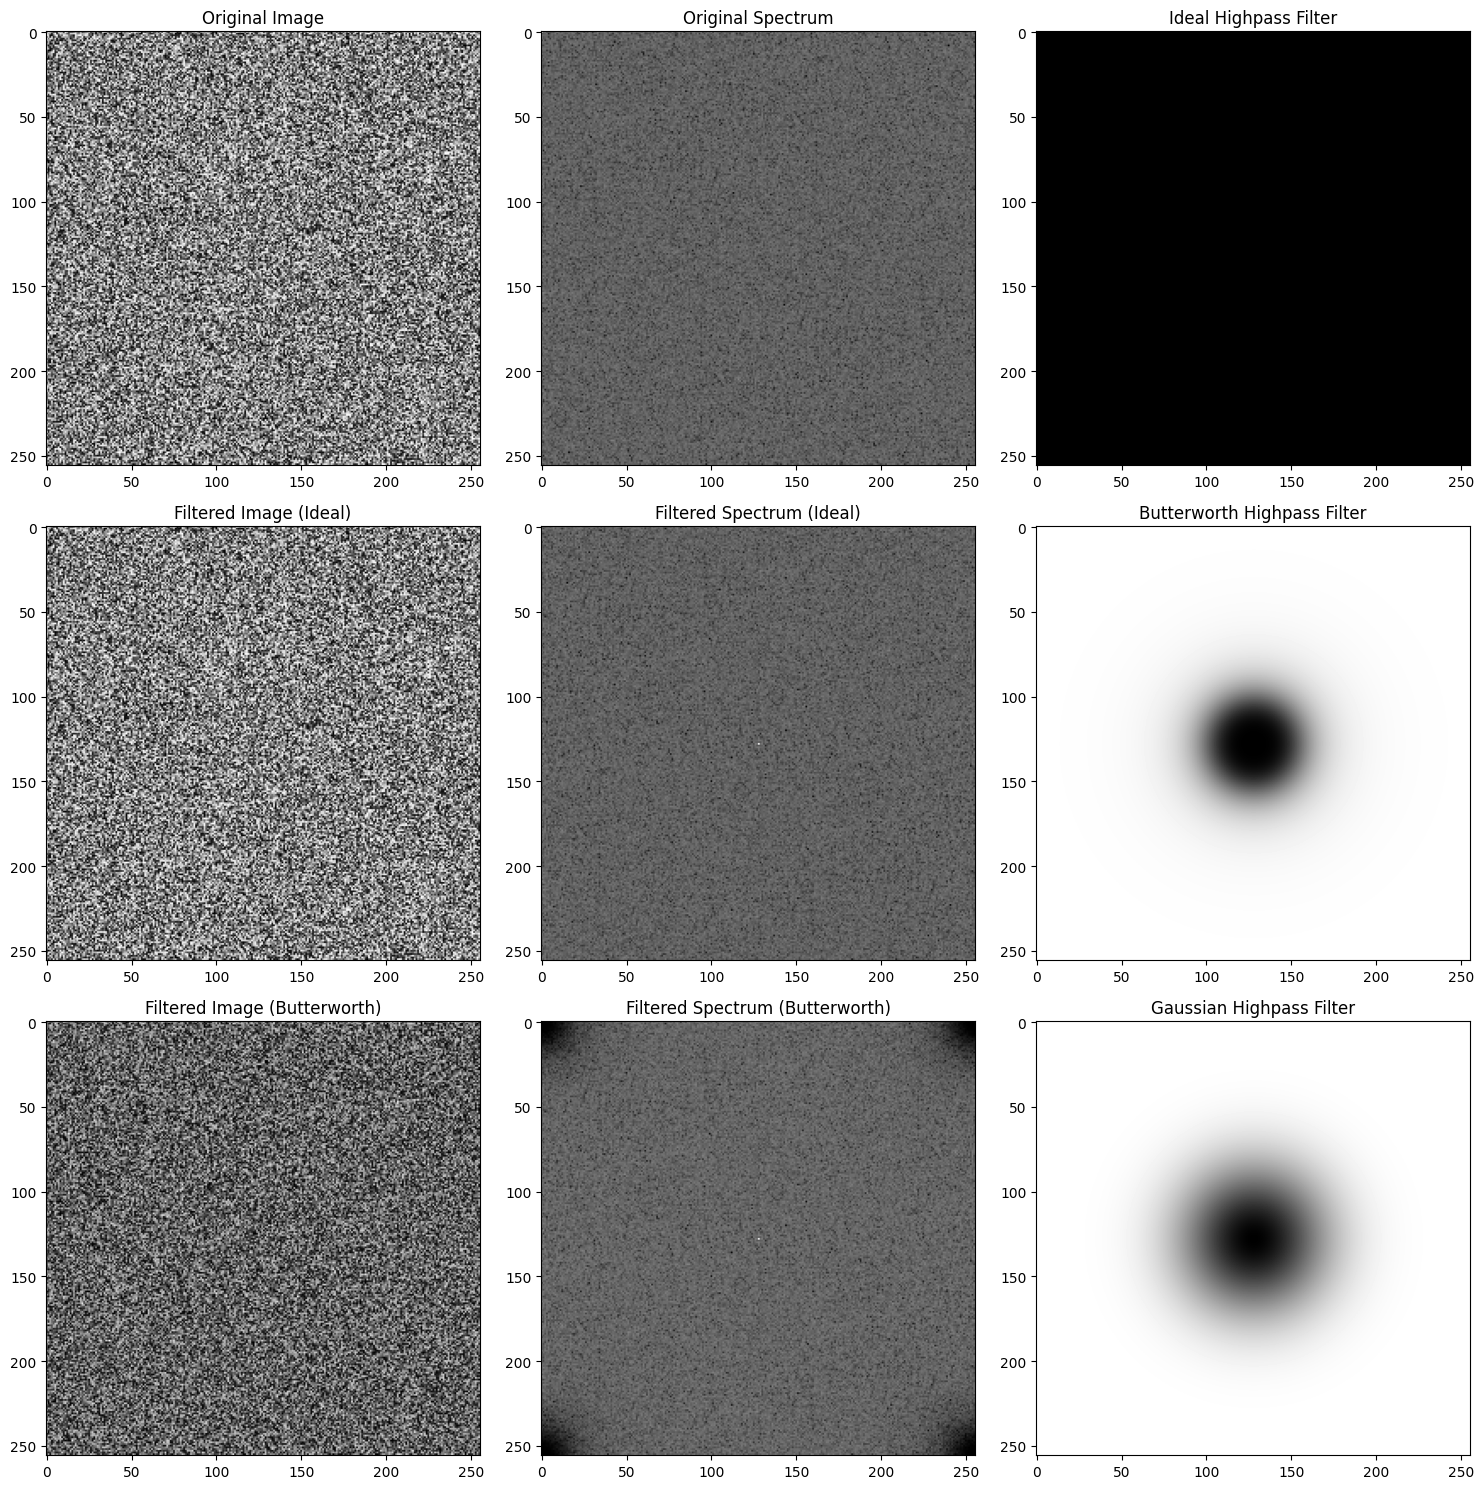

In [ ]:



# Generate a sample image


np.random.seed(42)


image = np.random.random((256, 256))  # Replace with your image data





# Compute the 2D Fourier Transform


image_fft = fft2(image)





# Define filter functions


def ideal_highpass_filter(image_shape, cutoff_frequency):
    rows, cols =image_shape
    center_row,center_col = rows // 2, cols // 2
    filter_mask =np.ones((rows, cols))


    for i in range(rows):
        for j in range(cols):
            distance =np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_frequency:
              filter_mask[i, j] = 0
            return filter_mask


def butterworth_highpass_filter(image_shape,cutoff_frequency, n):
   rows, cols = image_shape
   center_row,center_col = rows // 2, cols // 2
   filter_mask =np.ones((rows, cols))


   for i in range(rows):
        for j in range(cols):
            distance =np.sqrt((i - center_row)**2 + (j - center_col)**2)
            filter_mask[i, j] = 1 / (1 + (cutoff_frequency / distance)**(2*n))
   return filter_mask





def gaussian_highpass_filter(image_shape, cutoff_frequency):
    rows, cols =image_shape
    center_row,center_col = rows // 2, cols // 2


    filter_mask =np.ones((rows, cols))


    for i in range(rows):
        for j in range(cols):
            distance =np.sqrt((i - center_row)**2 + (j - center_col)**2)
            filter_mask[i, j] = 1 - np.exp(-0.5 * (distance / cutoff_frequency)**2)
    return filter_mask





# Apply filters


cutoff_frequency = 30


ideal_filter = ideal_highpass_filter(image.shape,cutoff_frequency)


butterworth_filter =butterworth_highpass_filter(image.shape, cutoff_frequency, n=2)


gaussian_filter = gaussian_highpass_filter(image.shape,cutoff_frequency)





filtered_image_ideal = fftshift(image_fft) * ideal_filter


filtered_image_butterworth = fftshift(image_fft) *butterworth_filter


filtered_image_gaussian = fftshift(image_fft) * gaussian_filter





# Compute the inverse Fourier Transform


filtered_image_ideal = np.abs(ifft2(filtered_image_ideal))


filtered_image_butterworth =np.abs(ifft2(filtered_image_butterworth))


filtered_image_gaussian =np.abs(ifft2(filtered_image_gaussian))





# Plot images and filters


plt.figure(figsize=(15, 15))





plt.subplot(3, 3, 1)


plt.imshow(image, cmap='gray')


plt.title('Original Image')





plt.subplot(3, 3, 2)


plt.imshow(np.log(1 + np.abs(image_fft)), cmap='gray')


plt.title('Original Spectrum')





plt.subplot(3, 3, 3)


plt.imshow(ideal_filter, cmap='gray')


plt.title('Ideal Highpass Filter')





plt.subplot(3, 3, 4)


plt.imshow(filtered_image_ideal, cmap='gray')


plt.title('Filtered Image (Ideal)')





plt.subplot(3, 3, 5)


plt.imshow(np.log(1 + np.abs(fftshift(image_fft * ideal_filter))),cmap='gray')


plt.title('Filtered Spectrum (Ideal)')





plt.subplot(3, 3, 6)


plt.imshow(butterworth_filter, cmap='gray')


plt.title('Butterworth Highpass Filter')





plt.subplot(3, 3, 7)


plt.imshow(filtered_image_butterworth, cmap='gray')


plt.title('Filtered Image (Butterworth)')





plt.subplot(3, 3, 8)


plt.imshow(np.log(1 + np.abs(fftshift(image_fft *butterworth_filter))), cmap='gray')


plt.title('Filtered Spectrum (Butterworth)')





plt.subplot(3, 3, 9)


plt.imshow(gaussian_filter, cmap='gray')


plt.title('Gaussian Highpass Filter')





plt.tight_layout()


plt.show()